# Scattering

## 1. Morlet Wavelet

In [6]:
%matplotlib inline
import numpy as np
from scipy import signal, misc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter



In [2]:
def Morlet2D_grid(n_lines, n_columns, J = 0, theta = 0, sigma = 0.85, xi = 3 * np.pi / 4):
    """returns 2d Morlet real and imaginary filter of size (n_lines, n_columns), rotated by theta and dilated by 1/2^J"""
    X = np.arange(-n_columns // 2, n_columns // 2 + n_columns % 2, 1/2**J) #to get n_columns length vector
    Y = np.arange(-n_lines // 2, n_lines // 2 + n_lines % 2, 1/2**J)
    X, Y = np.meshgrid(X, Y)
    #rotate
    X_theta = np.cos(theta) * X + np.sin(theta) * Y 
    Y_theta = np.cos(theta) * Y - np.sin(theta) * X
    
    Wave = np.exp(1j * xi * (X_theta + Y_theta))
    Z_r = np.real(Wave)
    Z_i = np.imag(Wave)
    Gaus = np.exp(-np.sqrt(X_theta**2 + Y_theta**2) / (2 * sigma**2))
    Z_r *= Gaus
    Z_i *= Gaus
    
    #center Morlet wave
    Int_r = np.sum(Z_r)
    Int_i = np.sum(Z_i)
    Int_Gaus = np.sum(Gaus)

    beta_r = Int_r / Int_Gaus
    beta_i = Int_i/ Int_Gaus
    
    Z_r -= beta_r * Gaus
    Z_i -= beta_i * Gaus
    return(Z_r, Z_i)

### Representation d'une ondelette Morlet

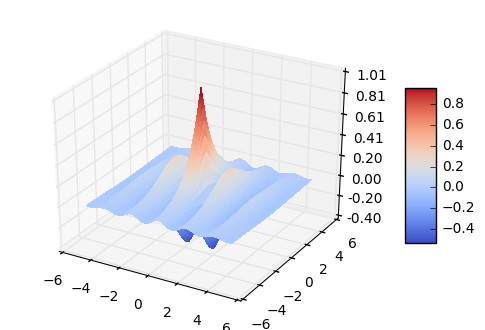

In [3]:
Z_r, Z_i = Morlet2D_grid(10, 10, 4, theta = 3*np.pi/4)
X = np.arange(-5, 5, 1/16)
Y = np.arange(-5, 5, 1/16)
X, Y = np.meshgrid(X, Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z_r, rstride=1, cstride=1, cmap = cm.coolwarm,
        linewidth=0, antialiased=False)
ax.set_zlim(-0.4, 1.01)


ax.zaxis.set_major_locator(LinearLocator(8))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## Convolution 

In [72]:
def morl_conv(image, J = 0, theta = 0, sigma = 0.85, xi = 3 * np.pi / 4):
    """image of shape (n_lines, n_columns) (levels of grey not RGB), returns convolution with Morlet2D_grid"""
    morlet_filter = Morlet2D_grid(image.shape[0], image.shape[1], J, theta, sigma, xi)
    return (signal.fftconvolve(image, morlet_filter[0], mode = "same"), signal.fftconvolve(image, morlet_filter[1], mode = "same"))

(768, 1024)

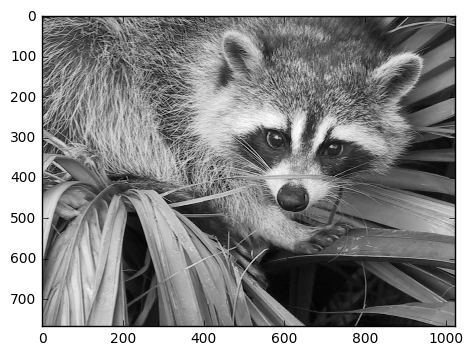

In [73]:
f = misc.face(gray = True)
plt.imshow(f, cmap=plt.cm.gray)
f.shape

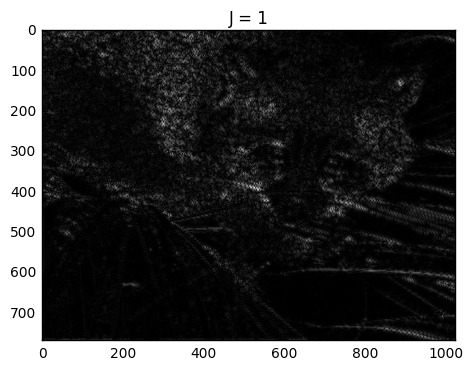

In [83]:
fig = plt.figure()
a = fig.add_subplot(1, 1, 1)
f2 = morl_conv(f, J = 1, theta = np.pi/3)
f2 = np.abs(f2)
plt.imshow(f2[0], cmap = plt.cm.gray)
a.set_title("J = 1")

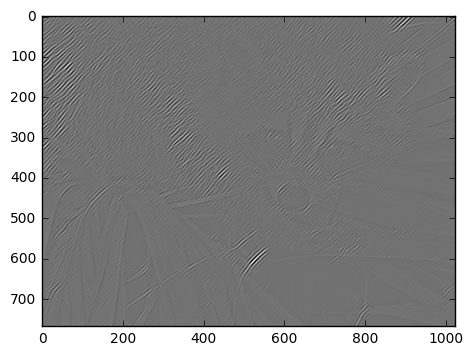

In [61]:
f3 = morl_conv(f, J = 2)
plt.imshow(f3, cmap = plt.cm.gray)

a = fig.add_subplot(1, 1, 1)
a.set_title("J = 2")
plt.show()

In [67]:
f2a = np.abs(f2)
f3a = np.abs(f3)

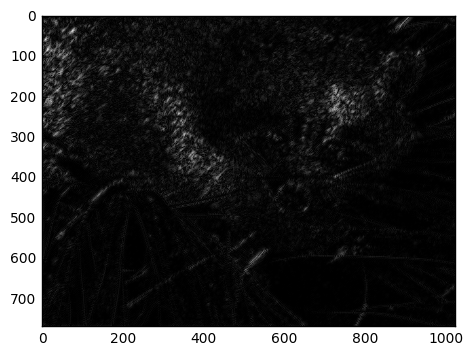

In [69]:
plt.imshow(f2a, cmap = plt.cm.gray)

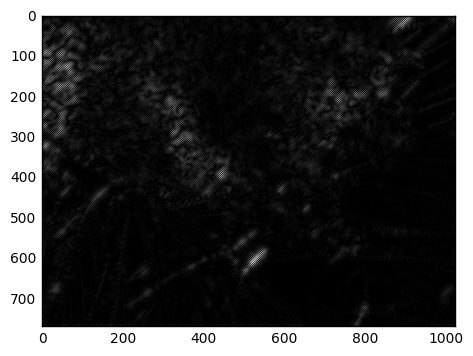

In [70]:
plt.imshow(f3a, cmap = plt.cm.gray)